[ PYTORCH MODEL ]

-	주제: 펭귄 품종 분류 모델
-	데이터 : penguins.csv
-	학습  : 지도학습 => 분류/다중분류

[1] 모듈로딩 <hr>

In [151]:
# 모듈 로딩

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder






In [152]:
# 데이터 준비
FILE = '../Data/penguins.csv'


[2] 데이터 로딩

In [153]:
penguins_DF = pd.read_csv(FILE) 
penguins_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [154]:
# 실제 데이터와 타입 체크
penguins_DF.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [155]:
# 1차 확인 사항
# - 결측치 컬럼이 7개 중 5개 존재


# [3] 탐색적 데이터 분석

# [3-1] 피쳐 전처리 

In [156]:
# 결측치 컬럼 5개 => 소량으로 drop 처리
penguins_DF.dropna(inplace=True)

In [157]:
penguins_DF.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# [3-2] 피쳐 전처리 

In [158]:
result = penguins_DF['species'].unique()

penguins_DF['species'] =  penguins_DF['species'].replace({ result[idx]:idx for idx in range(len(result))})

In [159]:
pd.set_option('future.no_silent_downcasting',True)

for col in ['species','island','sex']:
	result = penguins_DF[col].unique()
	penguins_DF[col] = penguins_DF[col].replace({ result[idx]:idx for idx in range(len(result))})
	penguins_DF[col] = penguins_DF[col].astype('int')

penguins_DF.dtypes

species                int64
island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [160]:
# 탐색적 데이터 분석
# species          
# island    
# sex
# onehot = OneHotEncoder()

# penguins_DF.species.unique() # 품종 3개 ['Adelie', 'Chinstrap', 'Gentoo']
# penguins_DF.island.unique() #  지역 3개 ['Torgersen', 'Biscoe', 'Dream']

# species = penguins_DF['species']
# island = penguins_DF['island']



# [3-2] 타겟 기준 상관관계

In [161]:
# 수치 확인 corr()   ==> bill_length_mm , bill_depth_mm , flipper_length_mm ,body_mass_g
penguins_DF.corr(numeric_only=True)['species']

# 품종, 지역 2,성별
# 피쳐 => 연속형 => 스케일링 
#		 범주형 => 순서O  : 정수인코딩
#				  순서X  : 원핫인코딩
# 타겟 => 라벨인코딩


species              1.000000
island              -0.009176
bill_length_mm       0.730548
bill_depth_mm       -0.740346
flipper_length_mm    0.850737
body_mass_g          0.750434
sex                 -0.010964
Name: species, dtype: float64

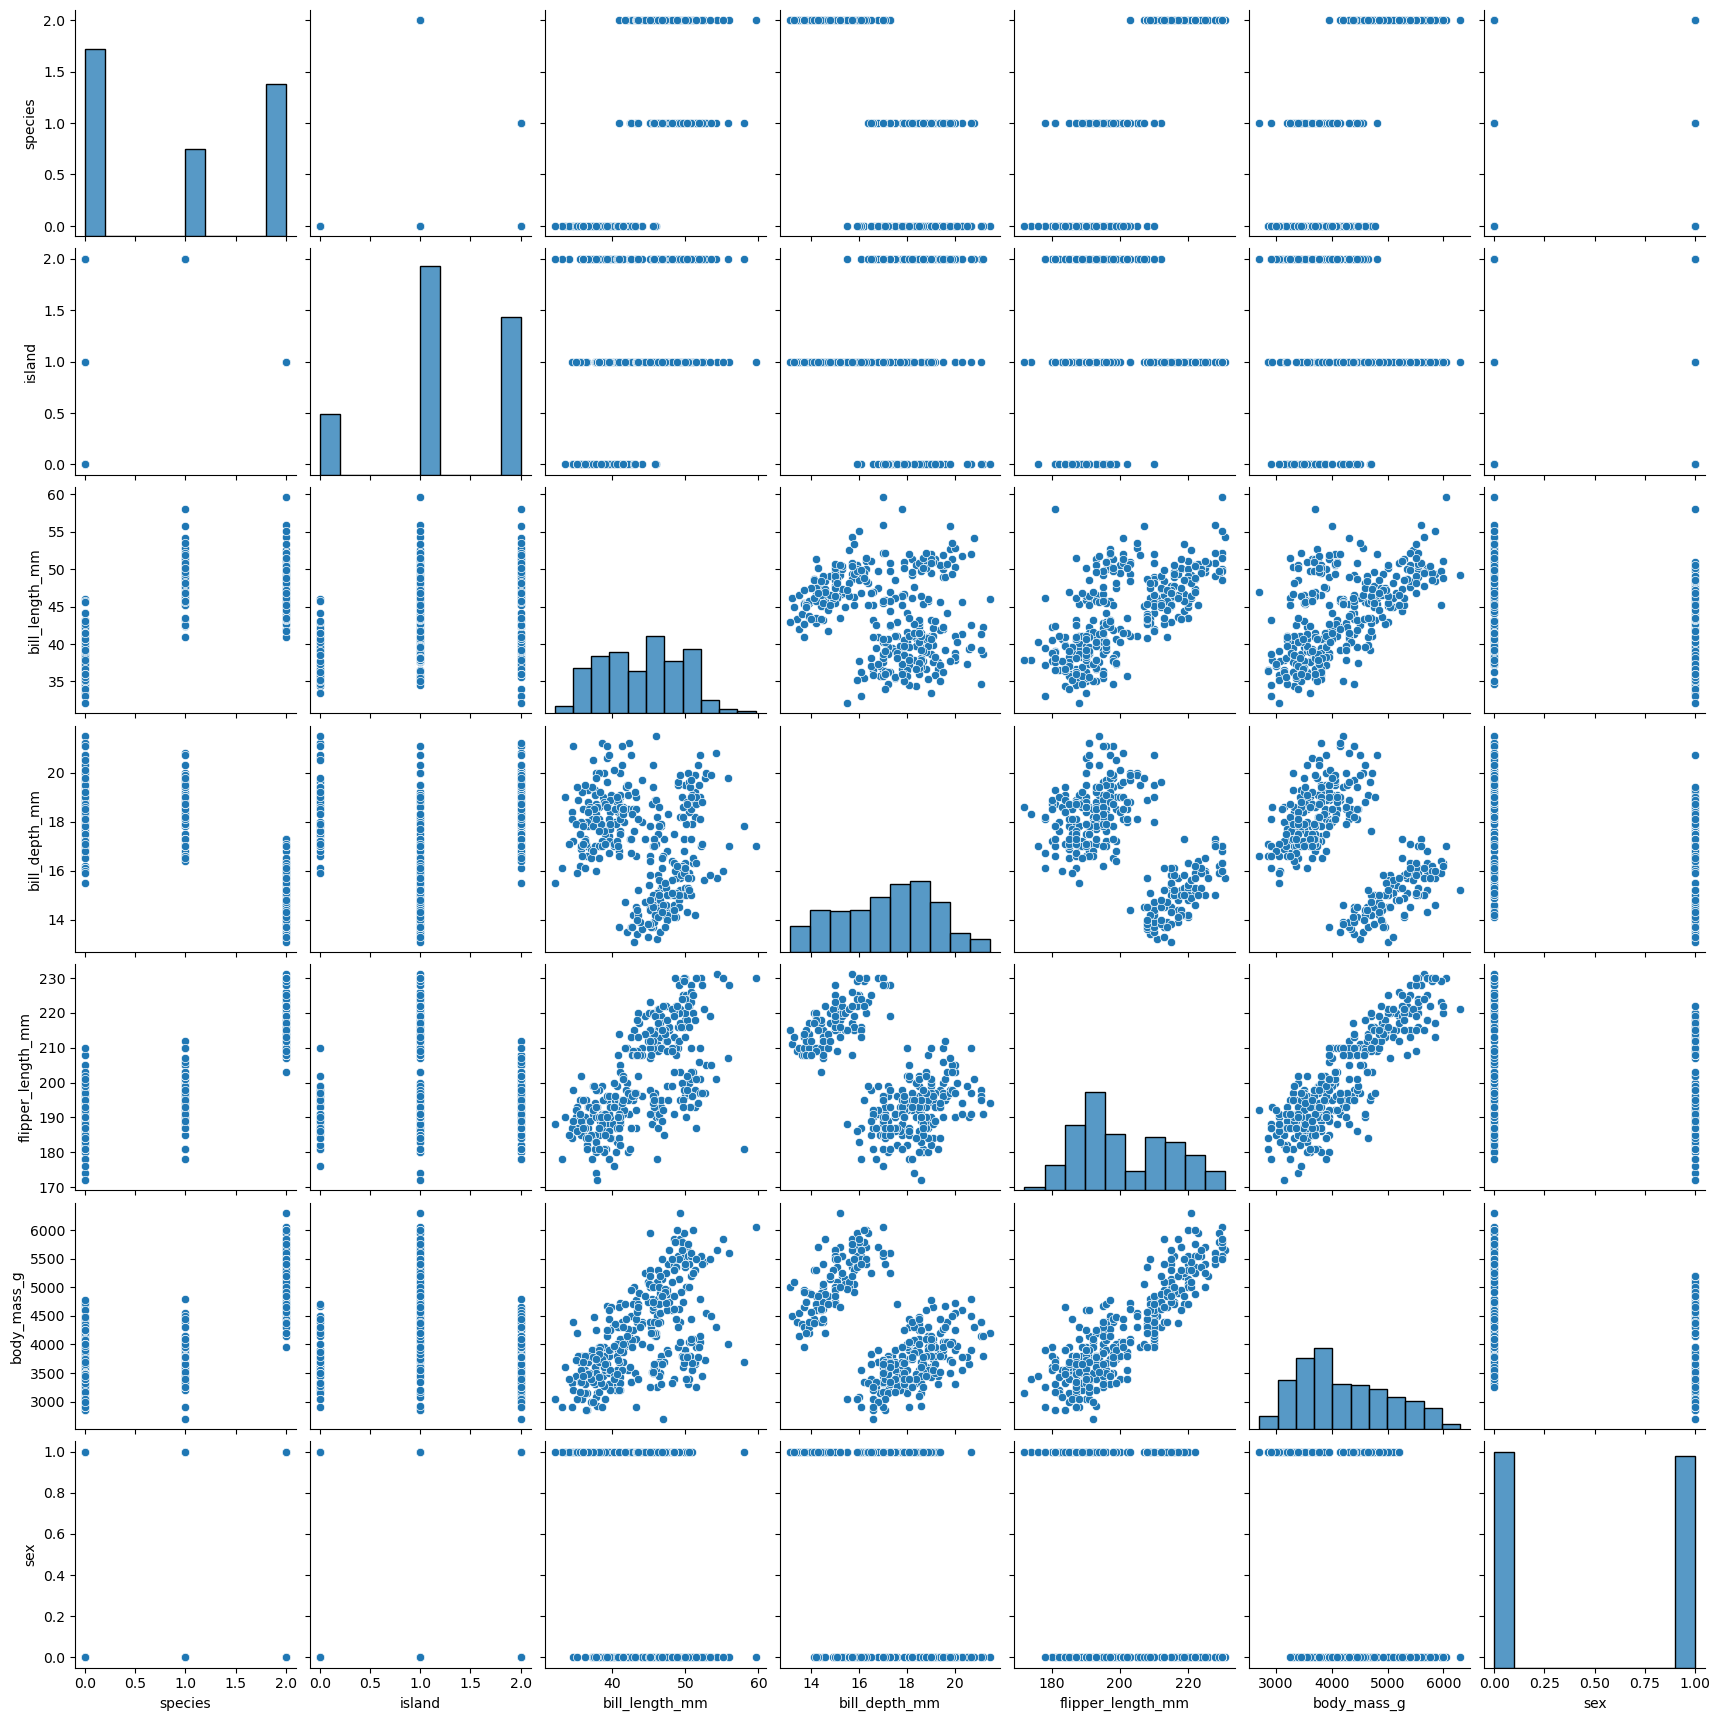

In [162]:
# 시각화 확인
sns.pairplot(penguins_DF)

# [3-4] 피쳐들끼리 관계성

In [163]:
# 수치확인

feautr_DF =penguins_DF[ penguins_DF.columns[2:-1]] 
feautr_DF

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [164]:
# 수치형 피쳐 정규화 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaledDF = scaler.fit_transform(feautr_DF)
scaledDF = pd.DataFrame(scaledDF)
scaledDF.head()

,0,1,2,3
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889


In [165]:
# 이상치 처리를 해야됨
feautr_DF.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [166]:
# 피쳐선택 : bill_length_mm, bill_deotp_mm, body_mass_g
# 타겟 품종 : speice

# 신경망 모델 구현 <hr>

-	피쳐와 타겟 분리
-	피쳐와 타겟 가공
-	학습용 & 테스트용
-	학습용 기준으로 표준화 & 정규화
-	데이터셋 클래스 설계 및 구현
-	모델 클래스 설계 및 구현
-	학습 진행
-	학습 결과 분석
-	튜닝 여부 결정
-	모델 저장 & 서비스 연동

[1] 모듈로딩 및 데이터 준비 <hr>

In [167]:
#%pip install torchinfo # 모델 정보 및 구조 관련 모듈


In [168]:
# 모듈 로딩 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader					# 데이터셋 관련

from torchmetrics.classification import *						# 모델성능 지표 관련
from torchinfo import summary									# 모델구조 및 정보 관련

from sklearn.model_selection import train_test_split			# 학습용 & 테스트용 데이터셋 분리
from sklearn.preprocessing import MinMaxScaler,StandardScaler	# 연속형 피쳐 스케일링
from sklearn.preprocessing import OneHotEncoder,LabelEncoder	# 범주형 피쳐 타겟 인코딩

# [2] 피쳐와 카겟 분리

In [169]:
Data_FILE = '../Data/penguins.csv'

In [170]:
dataDF =pd.read_csv(Data_FILE)
dataDF.dropna(inplace=True)

In [171]:
# 피쳐와 타겟분리
# 피쳐 - 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'
# 타겟 - 'species'
feautre_DF = dataDF[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
target_SR = dataDF[dataDF.columns[0]]

In [172]:
print(f'feautre_DF:{feautre_DF.shape} target_DF:{target_SR.shape}')

feautre_DF:(333, 4) target_DF:(333,)


# [3] 학습용 & 테스트용 분리

In [173]:
# 학습용 과 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(feautre_DF,target_SR, stratify=target_SR ,random_state=42)

In [174]:
print(f'[TRAIN]:{X_train.shape} y_train:{y_train.shape}')
print(f'[Test]:{X_test.shape} y_test:{y_test.shape}')


[TRAIN]:(249, 4) y_train:(249,)
[Test]:(84, 4) y_test:(84,)


# [4] 학습용 기준으로 정규화 <hr>

In [175]:
# 연속형 피쳐 스케일링

mmScaler = MinMaxScaler()
mmScaler.fit(X_train)

scaled_X_train = mmScaler.transform(X_train)
scaled_X_test = mmScaler.transform(X_test)

In [176]:
# 타겟 인코딩
lbEncoder = LabelEncoder()
lbEncoder.fit(y_train)
y_train = lbEncoder.transform(y_train)
y_test = lbEncoder.transform(y_test)

y_train, y_test

(array([1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0,
        2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0,
        2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0,
        0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0,
        0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2,
        2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2,
        2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0,
        1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0,
        0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 1,
        0, 0, 0, 0, 2, 2, 0]),
 array([1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1,
        0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0,
       

# [5] 데이터셋 클래스 정의 및 구현 <hr>

In [177]:
# 펭귄 데이터에 대한 전용 Dataset 클래스 정의
# 클래스 이름 : penguinDS
# 부모클래스 : nn.Module
# 데이터 구성 : 피쳐 3개 DF 타겟 1 DF
# 필수 : __init__ (self, 피쳐DF, 타겟DF)
# 		 __len__ (self) -> return 샘플수
# 		__getitem__ (self,index) => return index 에 해당하는 feature, target 단 ! tensor 

class PenguineDS(nn.Module):
	# 데이터의 피쳐, 타겟 외 기타 정보 초기화 메서드
	def __init__(self, feautre_DF, target_DF):
		super().__init__()
		self.feature = feautre_DF
		self.target = target_DF
		self.n_feature = feautre_DF.shape[1]
		self.n_samples = feautre_DF.shape[0]

	# 데이터의 갯수 반환 메서드
	def __len___(self):
		return self.n_samples
	
	# 특정 인덱스의 치펴와 타겟 텐서 반환 메서드
	def __getitem__(self, index):
		farr = self.feature.iloc[index].values
		tarr = self.target.iloc[index].values

		return torch.FloatTensor(farr), torch.LongTensor(tarr)

In [ ]:
# DS 확인
#

fDF = pd.DataFrame(scaled_X_train)
tDF = pd.Series(y_train).to_frame()

testDS = PenguineDS(fDF,tDF)

testDS
#scaled_X_train

PenguineDS()

In [ ]:
# 펭귄 데이터에 대한 전용 Dataset 클래스 정의
# 클래스 이름 : penguin_NPDS
# 부모클래스 : nn.Module
# 데이터 구성 : 피쳐 3개 NP 타겟 1 NP
# 필수 : __init__ (self, 피쳐DF, 타겟DF)
# 		 __len__ (self) -> return 샘플수
# 		__getitem__ (self,index) => return index 에 해당하는 feature, target 단 ! tensor 

class Penguine_NPDS(nn.Module):
	# 데이터의 피쳐, 타겟 외 기타 정보 초기화 메서드
	def __init__(self, feautre_NP, target_NP):
		super().__init__()
		self.feature = feautre_NP
		self.target = target_NP
		self.n_feature = feautre_NP.shape[1]
		self.n_samples = feautre_NP.shape[0]

	# 데이터의 갯수 반환 메서드
	def __len___(self):
		return self.n_samples
	
	# 특정 인덱스의 치펴와 타겟 텐서 반환 메서드
	def __getitem__(self, index):

		return torch.FloatTensor(self.feature[index]), torch.LongTensor(self.target[index])

In [ ]:
# 에포크 : DS 처음부터 ~ 끝까지 학습  
LOSS_HIST ={'Train':[], 'Valid':[]}   

# 에포크 단위 학습/검증 진행 
for epoch in range(EPOCHS):
    trainLoss = training()
    validLoss = evaluate()

    LOSS_HIST['Train'].append(trainLoss)
    LOSS_HIST['Valid'].append(validLoss)

    print(f'\nEPOCH[{epoch}/{EPOCHS}]----------------')
    print(f'- TRAIN_LOSS {trainLoss:.5f}')
    print(f'- VALID_LOSS {validLoss:.5f}')